<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating K-Means Clusters with the Iris Dataset

_Authors: Joseph Nelson (DC)_

---

Below you will practice using K-Means clustering and the various evaluation strategies we covered on the famous Iris dataset.

In [3]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets
import seaborn as sns

### 1: Import and format the data

Both sklearn and seaborn have ways to import the iris data:
- `sklearn.datasets.load_iris()`
- `sns.load_dataset("iris")`

The seaborn way is easier.

In [5]:
# A:
data = sns.load_dataset("iris")

### 2. Plot the data to visually estimate to correct number of clusters

In [14]:
# A:
X = data.iloc[:, :-1]
y = data.species

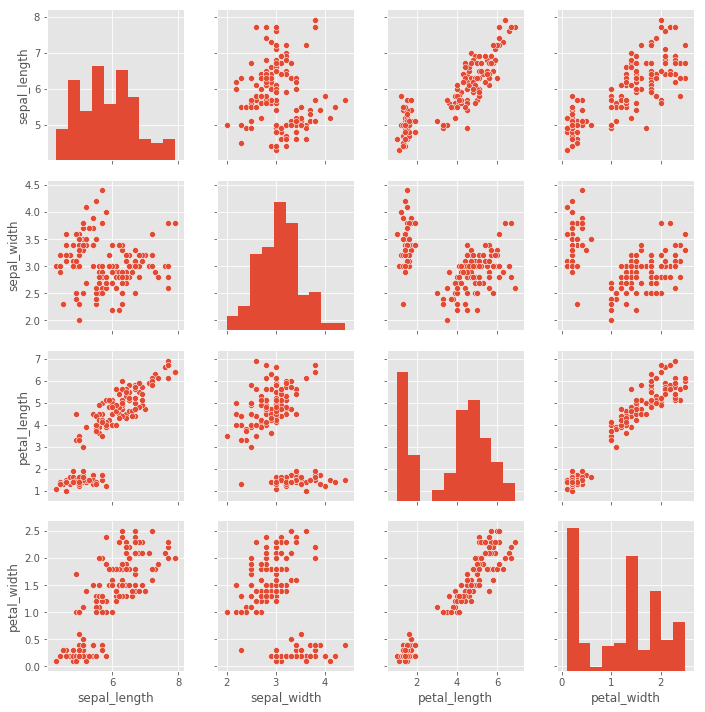

In [21]:
sns.pairplot(X)

### 3. Cluster the data using K-Means

- Select a number of clusters of your choice based on your visual analysis above.

In [15]:
# A:

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

**3.2 Compute the labels and centroids.**

In [20]:
# A:
km.labels_
data['cluster'] = km.labels_
data.sort_values('cluster')

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
74,6.4,2.9,4.3,1.3,versicolor,0
83,6.0,2.7,5.1,1.6,versicolor,0
82,5.8,2.7,3.9,1.2,versicolor,0
81,5.5,2.4,3.7,1.0,versicolor,0
80,5.5,2.4,3.8,1.1,versicolor,0
79,5.7,2.6,3.5,1.0,versicolor,0
78,6.0,2.9,4.5,1.5,versicolor,0
76,6.8,2.8,4.8,1.4,versicolor,0
75,6.6,3.0,4.4,1.4,versicolor,0
73,6.1,2.8,4.7,1.2,versicolor,0


### 4. Visually evaluate the clusters.
- Compare the predicted labels vs. the actual labels.

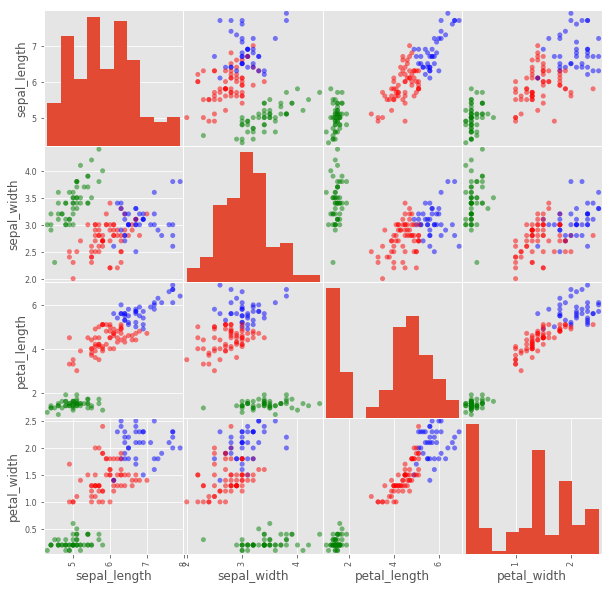

In [22]:
# A:
pd.plotting.scatter_matrix(X, c=colors[data.cluster], figsize=(10,10), s=100);

### 5. Check the centroids and plot them along two of the features.

In [27]:
# A:
labels= km.labels_
centroids = km.cluster_centers_
print centroids

[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.428       1.462       0.246     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


### 6. Compute the silhoutte score for your clusters.

What does the score indicate?

In [28]:
# A:
from sklearn import metrics
metrics.silhouette_score(X, labels, metric='euclidean')

0.55281901235641018

### 7. Plot the silhouette score for K = 2,3,4,5,6,7,8

You will need to fit a new model for each one. You can standardize your data before iterating through the clusters or not, up to you.

In [32]:
# A:

for k in range (2, 9, 1):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    labels= km.labels_
    centroids = km.cluster_centers_
    metrics.silhouette_score(X, labels, metric='euclidean')
    

0.681046169212
0.552819012356
0.497455189017
0.488748887093
0.367846498471
0.342613424742
0.350060295969


### 8. Plot the inertia score for the different K clusters.
    
Is there an "elbow" to select a good number of clusters or not?

In [10]:
# A:



### 9. Fit a K-Means with 3 clusters and pull out the cluster labels. Pull out the true labels as well.

Once you have both, adjust the predicted cluster labels to correspond to the true labels. For example, cluster 0 should correspond roughly to species 0, cluster 1 to species 1, and cluster 2 to species 2.

In [11]:
# A:

### 10. Calculate the completeness, homogeneity, V measure, and mutual information (adjusted) using the predicted clusters and the true labels.

In [12]:
# A: